## Bayes' Theorem Example: Monty Hall Problem (or "Deal Or No Deal") <a class="anchor" id="five"></a>

A very famous stats mind trick... You might have seen this already.

The [Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem) was originally posed (and solved) in a letter by Steve Selvin to the American Statistician in [1975](https://www.tandfonline.com/doi/abs/10.1080/00031305.1975.10479121). It became famous as a question from reader Craig F. Whitaker's letter quoted in Marilyn vos Savant's "Ask Marilyn" column in Parade magazine in 1990


You are playing a TV game show and are shown 2 doors.  One has a car behind it, the other a goat.  What are your chances of picking the door with the car?

OK, now there are 3 doors: one with a car, two with goats.  The game show host asks you to pick a door, but not to open it yet.  Then the host opens one of the other two doors (that you did not pick) and that has a goat.  The host offers you the opportunity to switch doors.

- One player decides to switch
- Another player prefers to stay with the previous choice
 
![https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/180px-Monty_open_door.svg.png)

- Now a third player comes in who has not seen what happened earlier. They pick a door.

*Which of the three players is most likely to win?*

You might know or remember the answer already ([or saw it in a movie?](https://www.youtube.com/watch?v=CYyUuIXzGgI))... but don't think now! **Let's simulate it**. 

## Time to get you hands dirty! Open a jupyter notebook and code it up! 

### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 

**Food for thought:** And what if you had $N$ doors to choose from and the presenter opens $p\leq N$ of them? Study how the probability of winning changes as a function of $p$ and $N$.

In [1]:
# LECTURE 2:
# MONTY HALL PROBLEM: 3 doors, 2 goats, 1 car - after a player chooses a door, one with a goat is opened
# PLAYER 0: keeps their first choice
# PLAYER 1: switch with the remaining door
# PLAYER 2: enters when there are only 2 doors and chooses one of them
# >>  WHO IS THE MOST LIKELY TO WIN? 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random

In [3]:
# number of losses and wins
LOSS = np.zeros(3)
WIN = np.zeros(3)

RANGE = 100000

for I in range(RANGE):
              
# > position of prize
    car_door = np.random.randint(0, 3) # DOOR WITH THE CAR
    
# > first two players (0, 1) choose a random door (0, 1, 2) - THEY CAN CHOOSE THE SAME DOOR
    List = [] 

    for i in range(2):
        door = np.random.randint(0, 3) 
        List.append(door)

    CHOICE = np.array(List) # array index = PLAYER || array value = CHOSEN DOOR

    # > player 0 keeps their door
    if CHOICE[0] == car_door: 
        WIN[0] += 1
    else: 
        LOSS[0] += 1

    # > Host eliminates one of the doors with a goat for player 1, not chosen by player 1
    list1 = [0, 1, 2]

    if CHOICE[1] != car_door:
        list1.remove(CHOICE[1])  
        list1.remove(car_door)  
        eliminated_door = list1[0]
    else: 
        list1.remove(car_door)  
        d = np.random.randint(0, 2) 
        eliminated_door = list1[d]

    # > Player 1 switches door 
    remaining_door = [0, 1, 2]
    remaining_door.remove(CHOICE[1])  
    remaining_door.remove(eliminated_door) 
    CHOICE[1] = remaining_door[0] # switch

    if CHOICE[1] == car_door: 
        WIN[1] += 1
    else: 
        LOSS[1] += 1

    # > Player 2 chooses one of the remaining doors -> they have to choose between 2 doors (goat - 0 + car - 1)
    choice2 = np.random.randint(0, 2) # they choose between 0 or 1
    if choice2 == 1: 
        WIN[2] += 1
    else: 
        LOSS[2] += 1

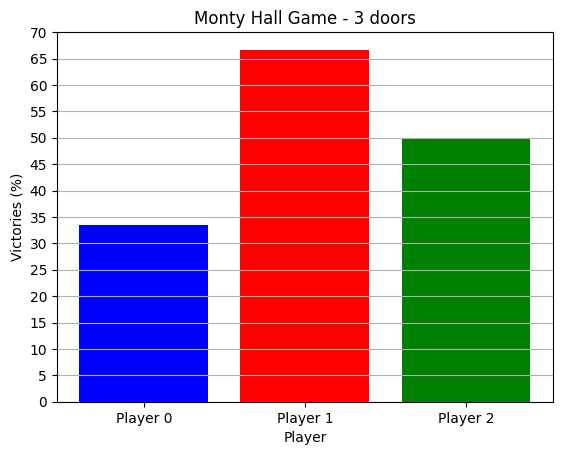

In [4]:
# > HISTOGRAM of the victories
WIN = (WIN / RANGE) * 100 
Players = ['Player 0', 'Player 1', 'Player 2']
plt.bar(Players, WIN, color=['blue', 'red', 'green'])
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5)) 

plt.title("Monty Hall Game - 3 doors")
plt.xlabel("Player")
plt.ylabel("Victories (%)")
plt.show()

In [5]:
# >> GENERALIZATION TO n DOORS
n = int(input("Insert new number of doors: "))
nLOSS = np.zeros(3)
nWIN = np.zeros(3)

RANGE = 100000

for I in range(RANGE):
    car_door = np.random.randint(0, n) 
    nlist = [] 

    for i in range(2):
        door = np.random.randint(0, n) 
        nlist.append(door)

    CHOICE = np.array(nlist) 

    if CHOICE[0] == car_door: 
        nWIN[0] += 1
    else: 
        nLOSS[0] += 1

    # NEED TO CHANGE METHOD OF ELIMINATE A DOOR
    nlist1 = list(range(n))

    if CHOICE[1] != car_door:
        remaining_door = car_door
    else: 
        remaining_door = random.choice(nlist1)
        while remaining_door == car_door:
            remaining_door = random.choice(nlist1)

    CHOICE[1] = remaining_door 

    if CHOICE[1] == car_door: 
        nWIN[1] += 1
    else: 
        nLOSS[1] += 1

    choice2 = np.random.randint(0, 2) 
    if choice2 == 1: 
        nWIN[2] += 1
    else: 
        nLOSS[2] += 1

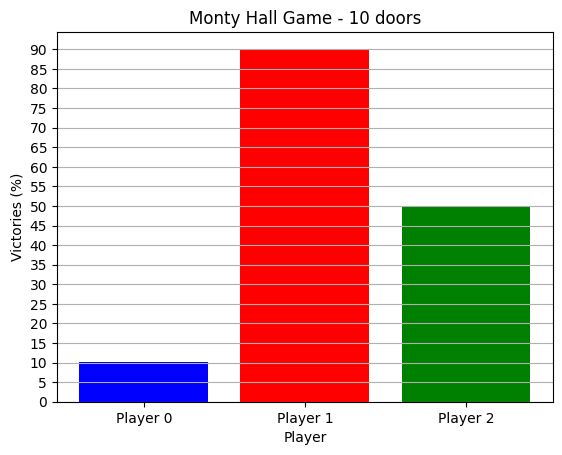

In [6]:
nWIN = (nWIN / RANGE) * 100 
Players = ['Player 0', 'Player 1', 'Player 2']
plt.bar(Players, nWIN, color=['blue', 'red', 'green'])
plt.grid(True, axis='y')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))  

plt.title("Monty Hall Game - "+ str(n) +" doors")
plt.xlabel("Player")
plt.ylabel("Victories (%)")
plt.show()